In [2]:
!pip install opendatasets

In [3]:
import opendatasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
opendatasets.download('https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandeepakash03
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales


100%|██████████| 6.90M/6.90M [00:00<00:00, 50.3MB/s]

In [5]:
ross_df=pd.read_csv('/content/rossmann-store-sales/train.csv',low_memory=False)

In [6]:
ross_df.head( )

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store_df=pd.read_csv( '/content/rossmann-store-sales/store.csv')

In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
merged_df=pd.merge(ross_df,store_df, on='Store',how='left')
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
merged_df.shape

(1017209, 18)

In [11]:
test_Df=pd.read_csv('/content/rossmann-store-sales/test.csv')
test_Df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
merged_test_df=test_Df.merge(store_df,how='right',on='Store')
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1.0,1,4.0,2015-09-17,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857.0,1,3.0,2015-09-16,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713.0,1,2.0,2015-09-15,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569.0,1,1.0,2015-09-14,1.0,1.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425.0,1,7.0,2015-09-13,0.0,0.0,0,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
round(merged_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.0,322.0,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.0,2.0,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5774.0,3850.0,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.0,464.0,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.0,7715.0,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.0,3.0,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2009.0,6.0,1900.0,2006.0,2010.0,2013.0,2015.0


In [14]:
merged_df.duplicated().sum()

0

In [18]:
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [19]:
merged_test_df['Date']=pd.to_datetime(merged_test_df['Date'])

In [20]:
merged_df.Date.min(),merged_test_df.Date.min()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-08-01 00:00:00'))

In [21]:
merged_df.Date.max(),merged_test_df.Date.max()

(Timestamp('2015-07-31 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratary Data Analysis

[]

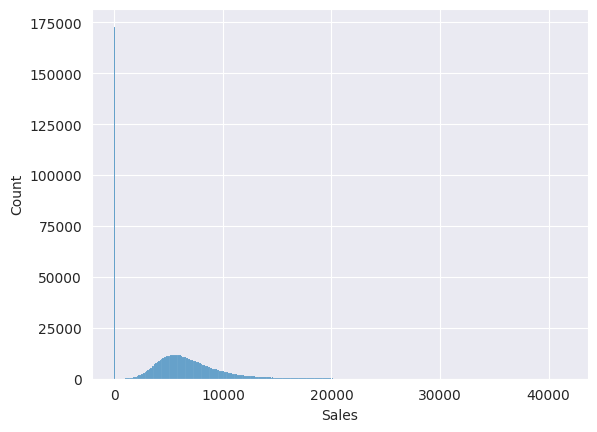

In [25]:
sns.set_style('darkgrid')
sns.histplot(merged_df,x='Sales')
plt.plot()

In [26]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [28]:
merged_df.Sales.value_counts()[0]

172871

In [29]:
merged_df=merged_df[merged_df.Open==1].copy()

[]

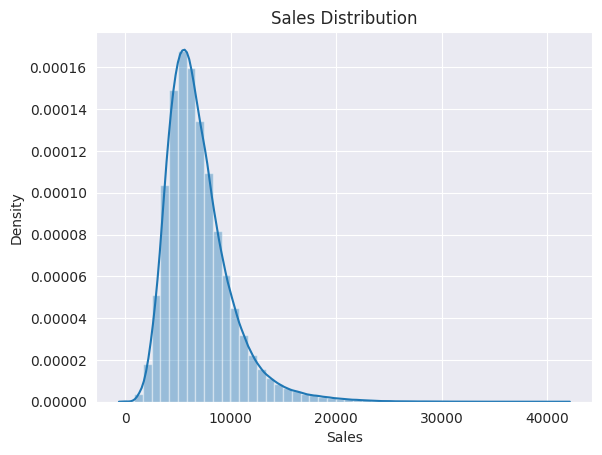

In [32]:
sns.distplot(merged_df.Sales)
plt.title('Sales Distribution')
plt.plot()

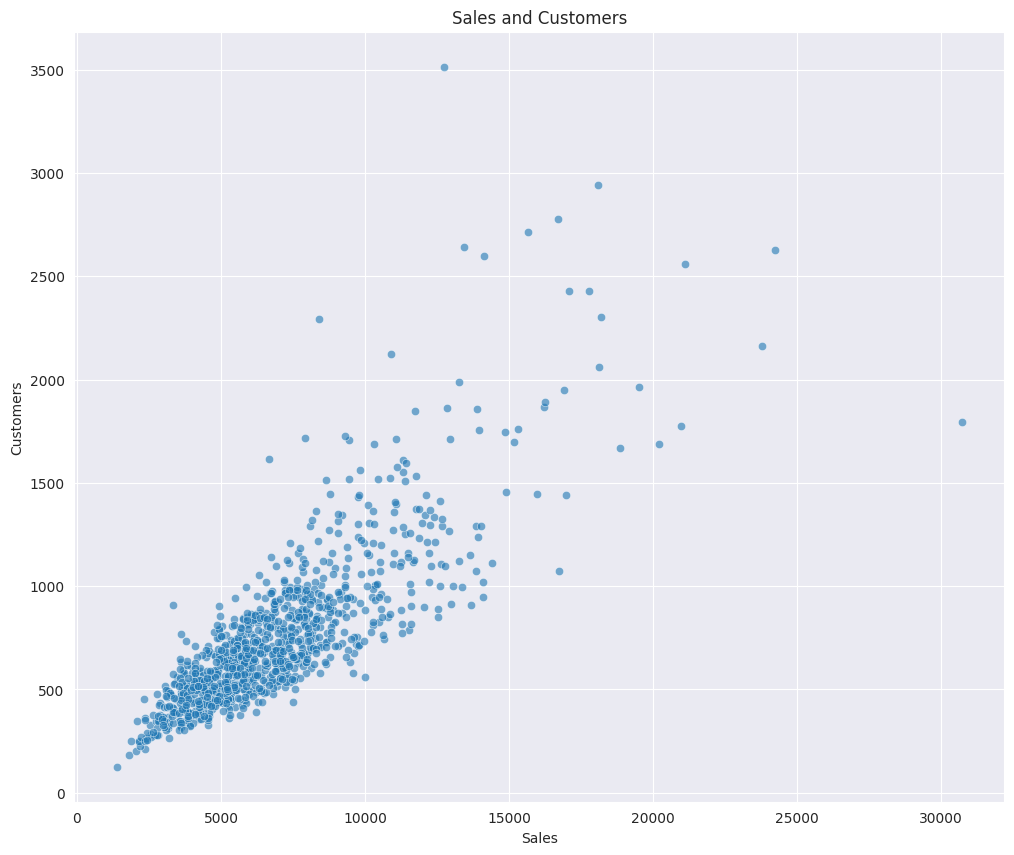

In [37]:
plt.figure(figsize=(12,10))
temp_df=merged_df.sample(1000)
sns.scatterplot(temp_df,x=temp_df.Sales,y=temp_df.Customers,alpha=0.6)
plt.title('Sales and Customers')
plt.show()

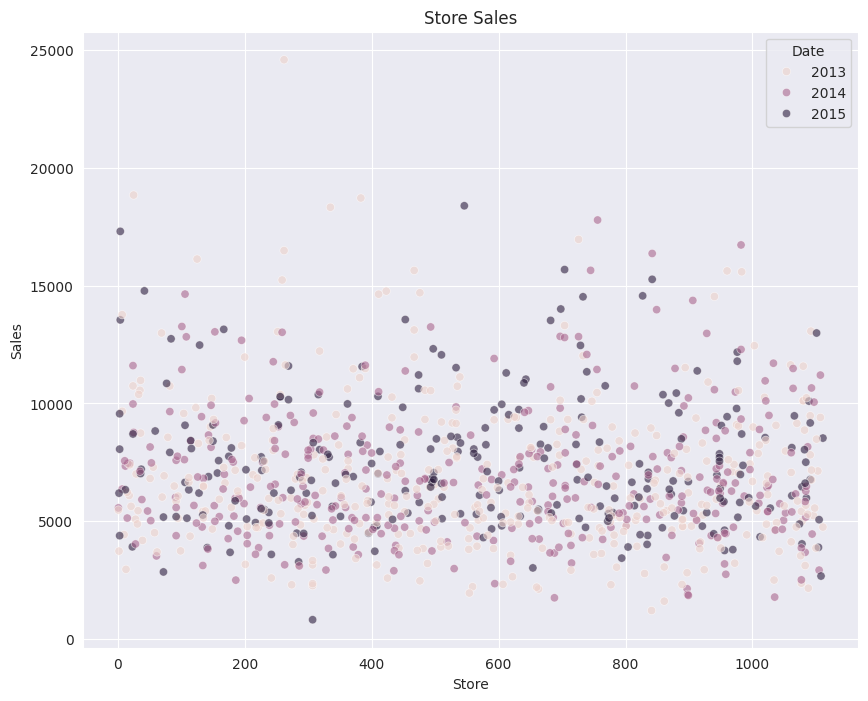

In [40]:
plt.figure(figsize=(10,8))
temp_df=merged_df.sample(1000)
sns.scatterplot(temp_df,x=temp_df.Store,y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.6)
plt.title('Store Sales')
plt.show()

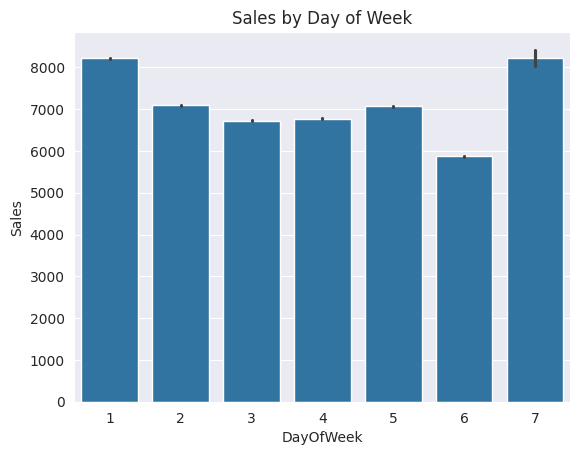

In [43]:
sns.barplot(merged_df,x='DayOfWeek',y='Sales')
plt.title('Sales by Day of Week')
plt.show()

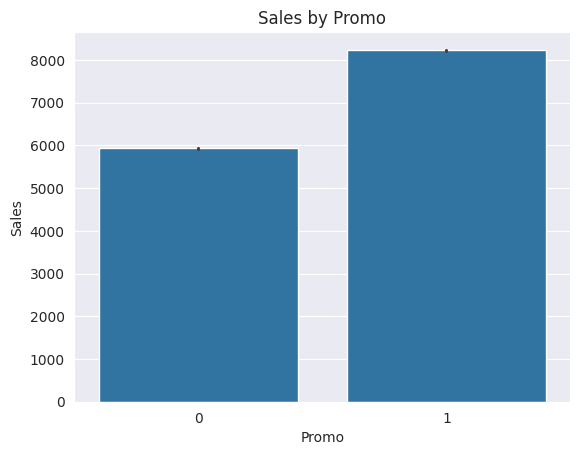

In [45]:
sns.barplot(merged_df,x='Promo',y='Sales')
plt.title('Sales by Promo')
plt.show()

## Feature Engineering

In [50]:
merged_df['DayOfWeek']=pd.to_datetime(merged_df['Date']).dt.dayofweek
merged_df['Month']=pd.to_datetime(merged_df['Date']).dt.month
merged_df['Year']=pd.to_datetime(merged_df['Date']).dt.year
merged_df['Day']=pd.to_datetime(merged_df['Date']).dt.day

In [51]:
merged_test_df['DayOfWeek']=pd.to_datetime(merged_test_df['Date']).dt.dayofweek
merged_test_df['Month']=pd.to_datetime(merged_test_df['Date']).dt.month
merged_test_df['Year']=pd.to_datetime(merged_test_df['Date']).dt.year
merged_test_df['Day']=pd.to_datetime(merged_test_df['Date']).dt.day

In [52]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,7,2015,31
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015,31
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,31
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,7,2015,31
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,7,2015,31


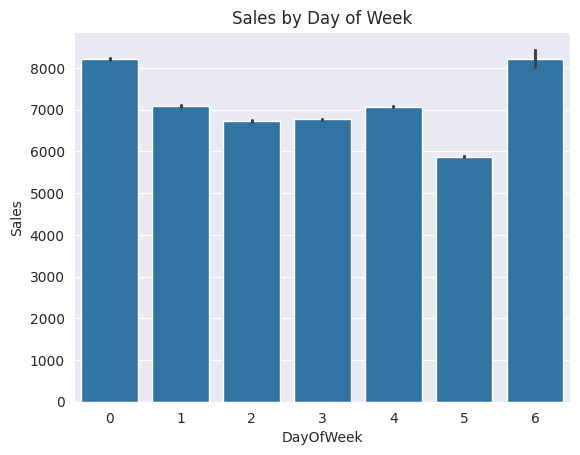

In [53]:
sns.barplot(merged_df,x='DayOfWeek',y='Sales')
plt.title('Sales by Day of Week')
plt.show()

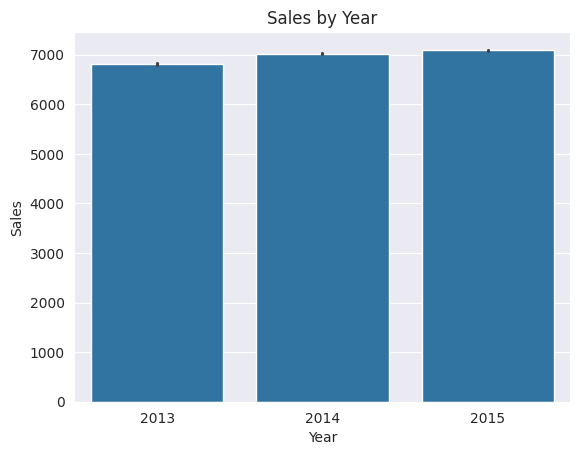

In [55]:
sns.barplot(merged_df,x='Year',y='Sales')
plt.title('Sales by Year')
plt.show()

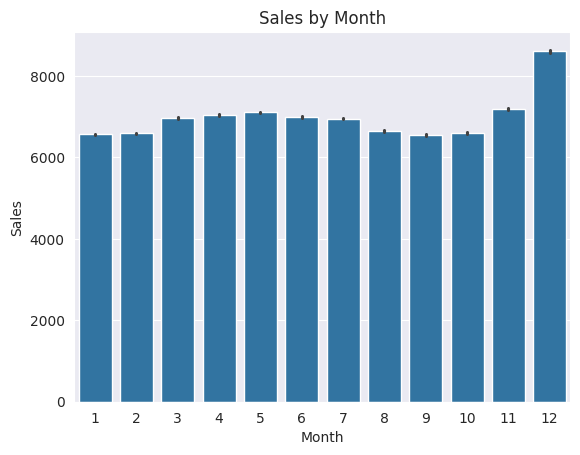

In [56]:
sns.barplot(merged_df,x='Month',y='Sales')
plt.title('Sales by Month')
plt.show()

Train and Split


In [112]:
train_size=int(.75*len(merged_df))

sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df.loc[:train_size],sorted_df.loc[train_size:]

In [113]:
train_df.shape,val_df.shape

((321089, 21), (523304, 21))

In [114]:
train_df.Date.min(),val_df.Date.min()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2013-12-11 00:00:00'))

In [115]:
input_cols=['Store','DayOfWeek','Customers','Open','Promo','SchoolHoliday','StateHoliday','StoreType','Month','Year','Day']
target_col=['Sales']

In [132]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [117]:
train_df[input_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 321089 entries, 1017190 to 633294
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          321089 non-null  int64 
 1   DayOfWeek      321089 non-null  int32 
 2   Customers      321089 non-null  int64 
 3   Open           321089 non-null  int64 
 4   Promo          321089 non-null  int64 
 5   SchoolHoliday  321089 non-null  int64 
 6   StateHoliday   321089 non-null  object
 7   StoreType      321089 non-null  object
 8   Month          321089 non-null  int32 
 9   Year           321089 non-null  int32 
 10  Day            321089 non-null  int32 
dtypes: int32(4), int64(5), object(2)
memory usage: 24.5+ MB


In [118]:
numerical_cols=train_inputs.select_dtypes(include=np.number).columns
categorical_cols=train_inputs.select_dtypes(include='object').columns

In [119]:
categorical_cols

Index(['StateHoliday', 'StoreType'], dtype='object')

In [120]:
numerical_cols

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'Month', 'Year', 'Day'],
      dtype='object')

In [121]:
train_df[numerical_cols].isna().sum()

Store            0
DayOfWeek        0
Customers        0
Open             0
Promo            0
SchoolHoliday    0
Month            0
Year             0
Day              0
dtype: int64

In [122]:
train_df[categorical_cols].isna().sum()

StateHoliday    0
StoreType       0
dtype: int64

In [123]:
val_inputs[numerical_cols].isna().sum()

Store            0
DayOfWeek        0
Customers        0
Open             0
Promo            0
SchoolHoliday    0
Month            0
Year             0
Day              0
dtype: int64

In [124]:
val_df[categorical_cols].isna().sum()

StateHoliday    0
StoreType       0
dtype: int64

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_inputs[numerical_cols]=scaler.fit_transform(train_df[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_df[numerical_cols])

In [141]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
for cols in categorical_cols:
  train_inputs[cols]=encoder.fit_transform(train_df[[cols]])
  val_inputs[cols]=encoder.transform(val_df[[cols]])


In [127]:
train_targets.mean()

Sales    6708.128952
dtype: float64

In [128]:
train_targets=train_targets.iloc[-1]

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model=LinearRegression()

In [142]:
model.fit(train_inputs,train_targets)

ValueError: could not broadcast input array from shape (4,321089) into shape (1,321089)